In [15]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize, sent_tokenize

categories = ['comp.os.ms-windows.misc', 'sci.space','rec.sport.baseball']
news_data = fetch_20newsgroups(subset='train', categories=categories)
len(news_data['data'])
print(news_data['data'][0])

From: aws@iti.org (Allen W. Sherzer)
Subject: Re: DC-X update???
Organization: Evil Geniuses for a Better Tomorrow
Lines: 122

In article <ugo62B8w165w@angus.mi.org> dragon@angus.mi.org writes:

>Exactly when will the hover test be done, 

Early to mid June.

>and will any of the TV
>networks carry it.  I really want to see that...

If they think the public wants to see it they will carry it. Why not
write them and ask? You can reach them at:


                          F: NATIONAL NEWS MEDIA


ABC "World News Tonight"                 "Face the Nation"
7 West 66th Street                       CBS News
New York, NY 10023                       2020 M Street, NW
212/887-4040                             Washington, DC 20036
                                         202/457-4321

Associated Press                         "Good Morning America"
50 Rockefeller Plaza                     ABC News
New York, NY 10020                       1965 Broadway
National Desk (212/621-1600)             New Y

In [17]:
vectorizer = TfidfVectorizer(stop_words='english', min_df=4,max_df=0.8)
stemmed_data = [" ".join(SnowballStemmer("english", ignore_stopwords=True).stem(word)
         for sent in sent_tokenize(message)
        for word in word_tokenize(sent))
        for message in news_data.data]



IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [38]:
print(stemmed_data[1])
dtm = vectorizer.fit_transform(stemmed_data)

from : phoenix.princeton.edu ! carlosn ( carlo g. niederstrass ) subject : reboot when i start window . origin : news @ nimast nntp-posting-host : week.princeton.edu organ : princeton univers line : 21 recent the follow problem has arrisen . the first time i turn on my comput when window start ( from my autoexec ) after the win31 titl screen the comput reboot on its own . usual the second time ( after reboot ) or from the dos prompt everyth work fine . s far as i rememb i have not chang my config.si or autoxec.bat or win.ini . i ca n't rememb whether this problem occur before i optimized/defrag my disk and creat a larger swap file ( thank you mathcad 4 : ( ) system 386sx , 4mb , stacker 2.0 , win31 , dos 5 -- - -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- - | carlo g. niederstrass | only two thing are infinit , | | princeton planetari societi | the univers and human | | | stupid , and i 'm not sure | | | about the former . - eins

<1x8060 sparse matrix of type '<class 'numpy.float64'>'
	with 154 stored elements in Compressed Sparse Row format>

In [25]:
terms = vectorizer.get_feature_names()
terms[5000]

'mix'

In [29]:
centered_dtm = dtm - np.mean(dtm, axis=0)
centered_dtm
u, s, vt = np.linalg.svd(centered_dtm)

matrix([[ 8.05430380e-03,  4.33797196e-03, -5.71919294e-03, ...,
         -3.80410610e-05,  3.76287668e-05, -2.36956180e-02],
        [-2.31971526e-02, -6.99581273e-03,  1.00041846e-02, ...,
          7.34057509e-05,  9.33076583e-05, -2.36956180e-02],
        [-4.06257517e-02, -1.57936254e-03,  1.06096048e-02, ...,
         -1.04301434e-04, -1.89295996e-05, -2.36956180e-02],
        ...,
        [ 3.09874418e-02,  4.86313909e-02,  6.11612745e-02, ...,
          8.17334726e-05, -9.31677442e-05, -2.36956180e-02],
        [ 1.13972042e-02, -1.88331313e-02,  3.64791335e-03, ...,
          5.95995672e-05, -1.64135634e-05, -2.36956180e-02],
        [ 3.14240143e-02,  3.02490142e-02,  2.37537379e-02, ...,
          7.74733958e-05, -6.04722420e-05, -2.36956180e-02]])

<IPython.core.display.Javascript object>


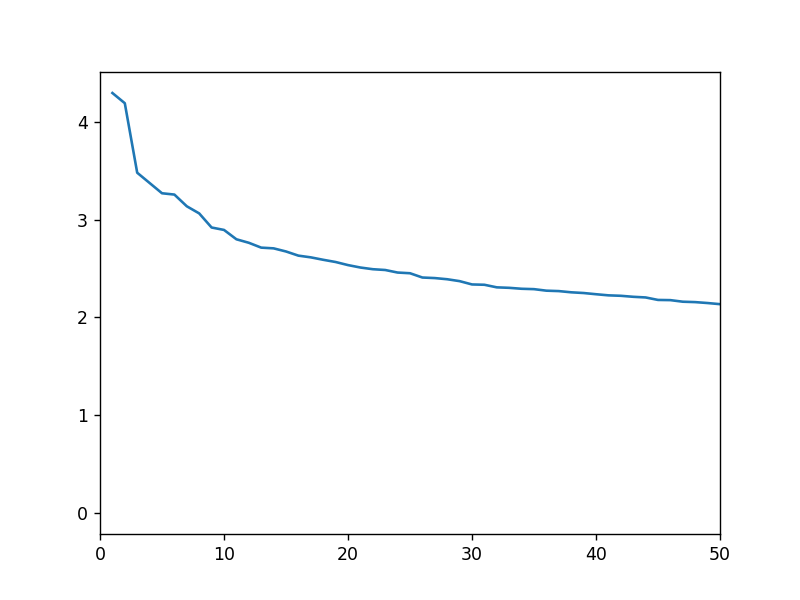

In [37]:
%matplotlib notebook

plt.xlim([0,50])
plt.plot(range(1,len(s)+1),s)
plt.show()

<IPython.core.display.Javascript object>


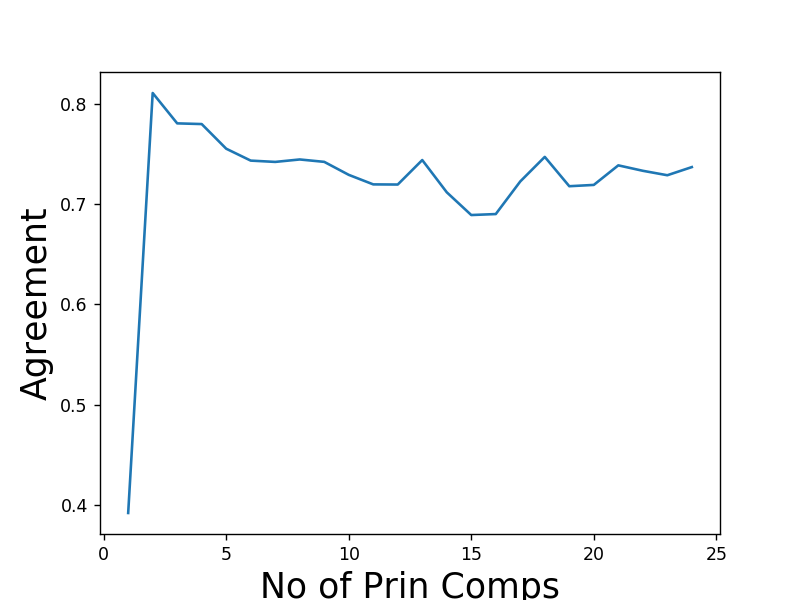

In [36]:
%matplotlib notebook

ag = []
max = len(u)
for k in range(1,25):
    vectorsk = u[:,:k] @ np.diag(s[:k])
    kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=10, random_state=0)
    kmeans.fit_predict(vectorsk)
    labelsk = kmeans.labels_
    ag.append(metrics.v_measure_score(labelsk,news_data.target)) # closer to 1 means better clustering

plt.plot(range(1,25),ag)
plt.ylabel('Agreement',size=20)
plt.xlabel('No of Prin Comps',size=20)
plt.show()